# Data fields
# Here's a brief version of what you'll find in the data description file.

# SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
# MSSubClass: The building class 
# MSZoning: The general zoning classification 
# LotFrontage: Linear feet of street connected to property -
# LotArea: Lot size in square feet 
# Street: Type of road access 
# Alley: Type of alley access
# LotShape: General shape of property
# LandContour: Flatness of the property -
# Utilities: Type of utilities available 
# LotConfig: Lot configuration
# LandSlope: Slope of property
# Neighborhood: Physical locations within Ames city limits
# Condition1: Proximity to main road or railroad
# Condition2: Proximity to main road or railroad (if a second is present)
# BldgType: Type of dwelling
# HouseStyle: Style of dwelling
# OverallQual: Overall material and finish quality
# OverallCond: Overall condition rating
# YearBuilt: Original construction date
# YearRemodAdd: Remodel date
# RoofStyle: Type of roof
# RoofMatl: Roof material
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)
# MasVnrType: Masonry veneer type
# MasVnrArea: Masonry veneer area in square feet
# ExterQual: Exterior material quality
# ExterCond: Present condition of the material on the exterior
# Foundation: Type of foundation
# BsmtQual: Height of the basement
# BsmtCond: General condition of the basement
# BsmtExposure: Walkout or garden level basement walls
# BsmtFinType1: Quality of basement finished area
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinType2: Quality of second finished area (if present)
# BsmtFinSF2: Type 2 finished square feet
# BsmtUnfSF: Unfinished square feet of basement area
# TotalBsmtSF: Total square feet of basement area
# Heating: Type of heating
# HeatingQC: Heating quality and condition
# CentralAir: Central air conditioning
# Electrical: Electrical system
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
# LowQualFinSF: Low quality finished square feet (all floors)
# GrLivArea: Above grade (ground) living area square feet
# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms
# FullBath: Full bathrooms above grade
# HalfBath: Half baths above grade
# Bedroom: Number of bedrooms above basement level
# Kitchen: Number of kitchens
# KitchenQual: Kitchen quality
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# Functional: Home functionality rating
# Fireplaces: Number of fireplaces
# FireplaceQu: Fireplace quality
# GarageType: Garage location
# GarageYrBlt: Year garage was built
# GarageFinish: Interior finish of the garage
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet
# GarageQual: Garage quality
# GarageCond: Garage condition
# PavedDrive: Paved driveway
# WoodDeckSF: Wood deck area in square feet
# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet
# PoolArea: Pool area in square feet
# PoolQC: Pool quality
# Fence: Fence quality
# MiscFeature: Miscellaneous feature not covered in other categories
# MiscVal: (Dollar) Value of miscellaneous feature
# MoSold: Month Sold
# YrSold: Year Sold
# SaleType: Type of sale
# SaleCondition: Condition of sale

# Project Steps :
# Understand the problem
# Collect the data 
# Understand the data
# Seggregate the data in two parts numeric and categorical
# Clean numeric and categorical data both 
# Analyse the data 
# Encode the categorical data in numeric data
# Train the data 
# Model fitting
# Model evaluation of test data 

# Import Libraries 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE,r2_score as r2
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Read Data

In [9]:
pd.set_option('display.max_columns',None)

In [10]:
df=pd.read_csv("train (1).csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

# Checking Shape

In [11]:
df.shape

(1460, 81)

# Droping the Id column

In [12]:
df.drop(columns=["Id"],inplace=True)

# Checking Shape

In [13]:
df.shape

(1460, 80)

# Checking info

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Check describe

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


# Checking missing row percentage of each columns

In [16]:
for i in df.columns:
    print(i,"====>",(df[i].isnull().sum()*100)/df.shape[0],"%")

MSSubClass ====> 0.0 %
MSZoning ====> 0.0 %
LotFrontage ====> 17.73972602739726 %
LotArea ====> 0.0 %
Street ====> 0.0 %
Alley ====> 93.76712328767124 %
LotShape ====> 0.0 %
LandContour ====> 0.0 %
Utilities ====> 0.0 %
LotConfig ====> 0.0 %
LandSlope ====> 0.0 %
Neighborhood ====> 0.0 %
Condition1 ====> 0.0 %
Condition2 ====> 0.0 %
BldgType ====> 0.0 %
HouseStyle ====> 0.0 %
OverallQual ====> 0.0 %
OverallCond ====> 0.0 %
YearBuilt ====> 0.0 %
YearRemodAdd ====> 0.0 %
RoofStyle ====> 0.0 %
RoofMatl ====> 0.0 %
Exterior1st ====> 0.0 %
Exterior2nd ====> 0.0 %
MasVnrType ====> 0.547945205479452 %
MasVnrArea ====> 0.547945205479452 %
ExterQual ====> 0.0 %
ExterCond ====> 0.0 %
Foundation ====> 0.0 %
BsmtQual ====> 2.5342465753424657 %
BsmtCond ====> 2.5342465753424657 %
BsmtExposure ====> 2.6027397260273974 %
BsmtFinType1 ====> 2.5342465753424657 %
BsmtFinSF1 ====> 0.0 %
BsmtFinType2 ====> 2.6027397260273974 %
BsmtFinSF2 ====> 0.0 %
BsmtUnfSF ====> 0.0 %
TotalBsmtSF ====> 0.0 %
Heating ==

In [17]:
df.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# Check unique values of each column

In [18]:
for i in df.columns:
    print(i,"====>",df[i].unique()," = ",df[i].nunique(),"\n")

MSSubClass ====> [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]  =  15 

MSZoning ====> ['RL' 'RM' 'C (all)' 'FV' 'RH']  =  5 

LotFrontage ====> [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]  =  110 

LotArea ====> [ 8450  9600 11250 ... 17217 13175  9717]  =  1073 

Street ====> ['Pave' 'Grvl']  =  2 

Alley ====> [nan 'Grvl' 'Pave']  =  2 

LotShape ====> ['Reg' 'IR1' 'IR2' 'IR3']  =  4 

LandContour ====> ['Lvl' 'Bnk' 'Low' 'HLS']  =  4 

Utilities ====> ['Al

# Droping those column which have greater than 70% missing values 

In [19]:
df.drop(columns=["Alley","PoolQC","Fence","MiscFeature"],inplace=True)

In [20]:
df.shape

(1460, 76)

# # Seggregate the numeric and object types columns 

In [21]:
numeric=["int","float"]
df_numeric=df.select_dtypes(include=numeric)
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [22]:
df_numeric.shape

(1460, 37)

# Check info of numeric columns

In [23]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

# Check missing values of numeric columns

In [24]:
for i in df_numeric.columns:
    print(i,"====>",df_numeric[i].isnull().sum())

MSSubClass ====> 0
LotFrontage ====> 259
LotArea ====> 0
OverallQual ====> 0
OverallCond ====> 0
YearBuilt ====> 0
YearRemodAdd ====> 0
MasVnrArea ====> 8
BsmtFinSF1 ====> 0
BsmtFinSF2 ====> 0
BsmtUnfSF ====> 0
TotalBsmtSF ====> 0
1stFlrSF ====> 0
2ndFlrSF ====> 0
LowQualFinSF ====> 0
GrLivArea ====> 0
BsmtFullBath ====> 0
BsmtHalfBath ====> 0
FullBath ====> 0
HalfBath ====> 0
BedroomAbvGr ====> 0
KitchenAbvGr ====> 0
TotRmsAbvGrd ====> 0
Fireplaces ====> 0
GarageYrBlt ====> 81
GarageCars ====> 0
GarageArea ====> 0
WoodDeckSF ====> 0
OpenPorchSF ====> 0
EnclosedPorch ====> 0
3SsnPorch ====> 0
ScreenPorch ====> 0
PoolArea ====> 0
MiscVal ====> 0
MoSold ====> 0
YrSold ====> 0
SalePrice ====> 0


# Check missing value of numeric columns in percentage

In [25]:
for i in df_numeric.columns:
    print(i,"====>",(df_numeric[i].isnull().sum()*100)/df_numeric.shape[0],"%")

MSSubClass ====> 0.0 %
LotFrontage ====> 17.73972602739726 %
LotArea ====> 0.0 %
OverallQual ====> 0.0 %
OverallCond ====> 0.0 %
YearBuilt ====> 0.0 %
YearRemodAdd ====> 0.0 %
MasVnrArea ====> 0.547945205479452 %
BsmtFinSF1 ====> 0.0 %
BsmtFinSF2 ====> 0.0 %
BsmtUnfSF ====> 0.0 %
TotalBsmtSF ====> 0.0 %
1stFlrSF ====> 0.0 %
2ndFlrSF ====> 0.0 %
LowQualFinSF ====> 0.0 %
GrLivArea ====> 0.0 %
BsmtFullBath ====> 0.0 %
BsmtHalfBath ====> 0.0 %
FullBath ====> 0.0 %
HalfBath ====> 0.0 %
BedroomAbvGr ====> 0.0 %
KitchenAbvGr ====> 0.0 %
TotRmsAbvGrd ====> 0.0 %
Fireplaces ====> 0.0 %
GarageYrBlt ====> 5.5479452054794525 %
GarageCars ====> 0.0 %
GarageArea ====> 0.0 %
WoodDeckSF ====> 0.0 %
OpenPorchSF ====> 0.0 %
EnclosedPorch ====> 0.0 %
3SsnPorch ====> 0.0 %
ScreenPorch ====> 0.0 %
PoolArea ====> 0.0 %
MiscVal ====> 0.0 %
MoSold ====> 0.0 %
YrSold ====> 0.0 %
SalePrice ====> 0.0 %


In [26]:
df_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [27]:
df_numeric.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500


# List of insignificient features of numeric columns.

In [28]:
numeric_drop=["GarageYrBlt","GarageArea","ScreenPorch","MoSold","WoodDeckSF","OverallCond","2ndFlrSF","BsmtFinSF2","BsmtUnfSF"]

In [29]:
len(numeric_drop)

9

# Droping the insignificient features of numeric columns

In [30]:
df_numeric.drop(columns=numeric_drop,inplace=True)

In [31]:
df_numeric.shape

(1460, 28)

# Checking correlation of numeric columns

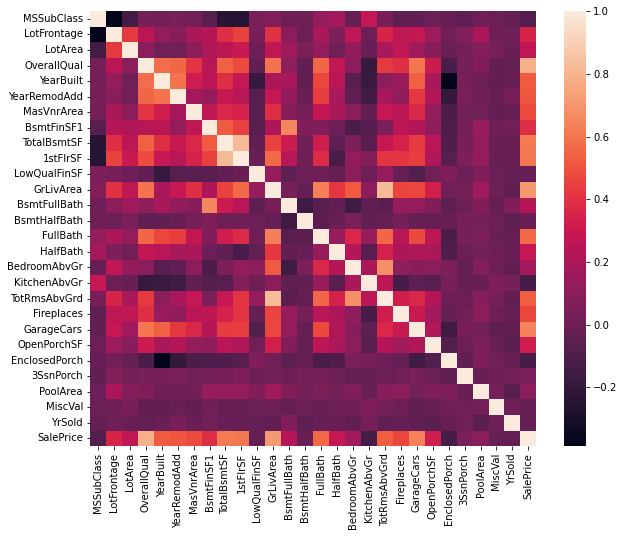

In [32]:
plt.figure(figsize=(10,8));
sns.heatmap(df_numeric.corr());

# Check null columns of numeric data from chart 

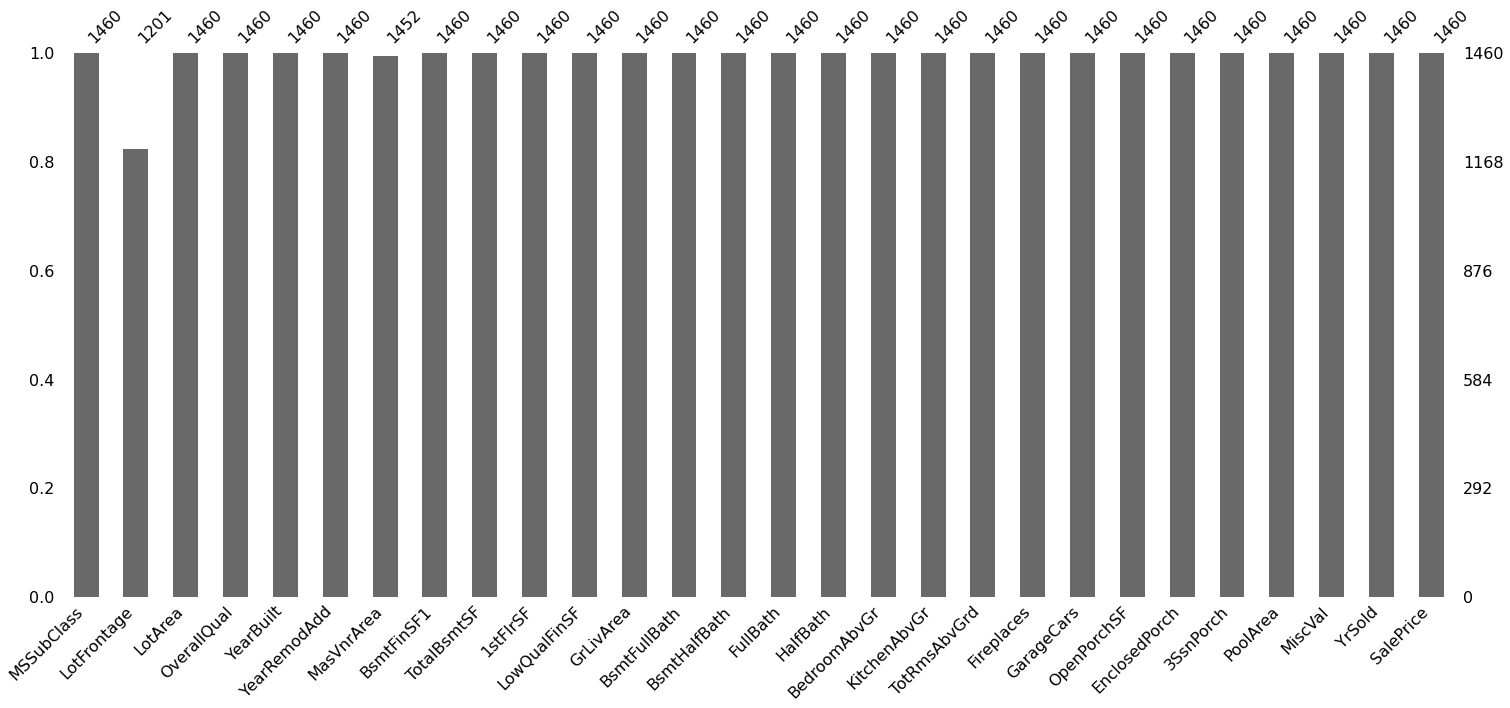

In [33]:
msno.bar(df_numeric);

In [34]:
# We can see in this chart there are two column which have missing values that is LotFrontage and MasVnrArea. 

# Check unique values of null columns

In [35]:
l=[]
for i in df_numeric.columns:
    if df_numeric[i].isnull().any():
        l.append(i)

In [36]:
l

['LotFrontage', 'MasVnrArea']

In [37]:
for i in l:
    print(i,"====>",df_numeric[i].unique(),"\n")

LotFrontage ====> [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.] 

MasVnrArea ====> [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.8

# Check distplot of missing values of numeric columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


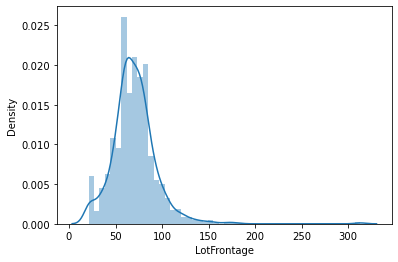

In [38]:
sns.distplot(df_numeric["LotFrontage"]);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


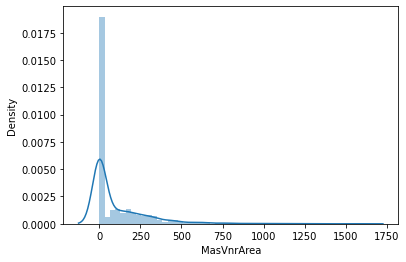

In [39]:
sns.distplot(df_numeric["MasVnrArea"]);

# Check unique values of numeric columns

In [40]:
for i in df_numeric.columns:
    print(i,"====>",df_numeric[i].unique(),"\n")

MSSubClass ====> [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] 

LotFrontage ====> [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.] 

LotArea ====> [ 8450  9600 11250 ... 17217 13175  9717] 

OverallQual ====> [ 7  6  8  5  9  4 10  3  1  2] 

YearBuilt ====> [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1

# Fill missing values of numeric columns

In [41]:
for i in df_numeric:
    if df_numeric[i].isnull().sum()>0:
        df_numeric[i]=df_numeric[i].fillna(df_numeric[i].median())

# Missing values have been filled of numeric columns

# Again check missing values in percentage after filling missing values

In [42]:
for i in df_numeric.columns:
    print(i,"====>",(df_numeric[i].isnull().sum()*100)/df_numeric.shape[0],"%")


MSSubClass ====> 0.0 %
LotFrontage ====> 0.0 %
LotArea ====> 0.0 %
OverallQual ====> 0.0 %
YearBuilt ====> 0.0 %
YearRemodAdd ====> 0.0 %
MasVnrArea ====> 0.0 %
BsmtFinSF1 ====> 0.0 %
TotalBsmtSF ====> 0.0 %
1stFlrSF ====> 0.0 %
LowQualFinSF ====> 0.0 %
GrLivArea ====> 0.0 %
BsmtFullBath ====> 0.0 %
BsmtHalfBath ====> 0.0 %
FullBath ====> 0.0 %
HalfBath ====> 0.0 %
BedroomAbvGr ====> 0.0 %
KitchenAbvGr ====> 0.0 %
TotRmsAbvGrd ====> 0.0 %
Fireplaces ====> 0.0 %
GarageCars ====> 0.0 %
OpenPorchSF ====> 0.0 %
EnclosedPorch ====> 0.0 %
3SsnPorch ====> 0.0 %
PoolArea ====> 0.0 %
MiscVal ====> 0.0 %
YrSold ====> 0.0 %
SalePrice ====> 0.0 %


In [43]:
df_numeric.shape

(1460, 28)

# From the domain knowledge above wewill remove the insignificient features from the data , now we are checking the VIF(Varience Influence Factor) of all the columns if VIF value is equal or greater than 10 it mean the feature or column is dependent than we will remove that column or if VIF value is less than 4 it means feature/column is independent.

In [44]:
df_numeric

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,YrSold,SalePrice
0,60,65.0,8450,7,2003,2003,196.0,706,856,856,0,1710,1,0,2,1,3,1,8,0,2,61,0,0,0,0,2008,208500
1,20,80.0,9600,6,1976,1976,0.0,978,1262,1262,0,1262,0,1,2,0,3,1,6,1,2,0,0,0,0,0,2007,181500
2,60,68.0,11250,7,2001,2002,162.0,486,920,920,0,1786,1,0,2,1,3,1,6,1,2,42,0,0,0,0,2008,223500
3,70,60.0,9550,7,1915,1970,0.0,216,756,961,0,1717,1,0,1,0,3,1,7,1,3,35,272,0,0,0,2006,140000
4,60,84.0,14260,8,2000,2000,350.0,655,1145,1145,0,2198,1,0,2,1,4,1,9,1,3,84,0,0,0,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,1999,2000,0.0,0,953,953,0,1647,0,0,2,1,3,1,7,1,2,40,0,0,0,0,2007,175000
1456,20,85.0,13175,6,1978,1988,119.0,790,1542,2073,0,2073,1,0,2,0,3,1,7,2,2,0,0,0,0,0,2010,210000
1457,70,66.0,9042,7,1941,2006,0.0,275,1152,1188,0,2340,0,0,2,0,4,1,9,2,1,60,0,0,0,2500,2010,266500
1458,20,68.0,9717,5,1950,1996,0.0,49,1078,1078,0,1078,1,0,1,0,2,1,5,0,1,0,112,0,0,0,2010,142125


In [45]:
vf=df_numeric.drop(columns=["SalePrice"])

In [46]:
vif = pd.DataFrame()  ##creating blank dataframe 
#vif
variables  = vf
#variables.shape
vif["VIF"] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
#vif["VIF"]
vif["features"]=vf.columns
#vif["features"]
vif



,VIF,features
0,4.609078,MSSubClass
1,17.108624,LotFrontage
2,2.612753,LotArea
3,64.313273,OverallQual
4,13503.769381,YearBuilt
5,17396.641284,YearRemodAdd
6,1.826995,MasVnrArea
7,4.770138,BsmtFinSF1
8,27.249047,TotalBsmtSF
9,51.381975,1stFlrSF


In [47]:
# We can see the VIF value of some columns is greater then 10 so we will remove that column from the dataset.

In [48]:
vif_dependent=["LotFrontage","YearRemodAdd","1stFlrSF","GrLivArea"]

In [49]:
df_numeric.drop(columns=vif_dependent,inplace=True)

In [50]:
df_numeric.shape

(1460, 24)

# Now we will be working on columns of object type

# Seggregate categorical columns in main dataframe

In [51]:
df_obj=df.select_dtypes(include="object")
df_obj.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


# Checking Shape of Categorical columns

In [52]:
df_obj.shape

(1460, 39)

# Checking info of Categorical columns

In [53]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

# List of insignificient feature of categorical columns

In [54]:
obj_drop=["FireplaceQu","GarageCond","GarageFinish","MasVnrType","Exterior1st","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","LandSlope","Condition2","BldgType"]

# Drop insignificient features of categorical columns

In [55]:
df_obj.drop(columns=obj_drop,inplace=True)

# Checking shape after removing the categorical columns

In [56]:
df_obj.shape

(1460, 26)

# Check unique values of categorical columns

In [57]:
for i in df_obj.columns:
    print(i,"====>",df_obj[i].unique(),"\n")

MSZoning ====> ['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street ====> ['Pave' 'Grvl'] 

LotShape ====> ['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour ====> ['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities ====> ['AllPub' 'NoSeWa'] 

LotConfig ====> ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

Neighborhood ====> ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1 ====> ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

HouseStyle ====> ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

RoofStyle ====> ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 

RoofMatl ====> ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile'] 

Exterior2nd ====> ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk C

# Check missing values in percentage of categorical columns

In [58]:
a=1
for i in df_obj.columns:
    print(a,". ",i,"====>",(df_obj[i].isnull().sum()*100)/df_obj.shape[0],"%\n")
    a=a+1

1 .  MSZoning ====> 0.0 %

2 .  Street ====> 0.0 %

3 .  LotShape ====> 0.0 %

4 .  LandContour ====> 0.0 %

5 .  Utilities ====> 0.0 %

6 .  LotConfig ====> 0.0 %

7 .  Neighborhood ====> 0.0 %

8 .  Condition1 ====> 0.0 %

9 .  HouseStyle ====> 0.0 %

10 .  RoofStyle ====> 0.0 %

11 .  RoofMatl ====> 0.0 %

12 .  Exterior2nd ====> 0.0 %

13 .  ExterQual ====> 0.0 %

14 .  ExterCond ====> 0.0 %

15 .  Foundation ====> 0.0 %

16 .  BsmtQual ====> 2.5342465753424657 %

17 .  HeatingQC ====> 0.0 %

18 .  CentralAir ====> 0.0 %

19 .  Electrical ====> 0.0684931506849315 %

20 .  KitchenQual ====> 0.0 %

21 .  Functional ====> 0.0 %

22 .  GarageType ====> 5.5479452054794525 %

23 .  GarageQual ====> 5.5479452054794525 %

24 .  PavedDrive ====> 0.0 %

25 .  SaleType ====> 0.0 %

26 .  SaleCondition ====> 0.0 %



# Check null columns from chart

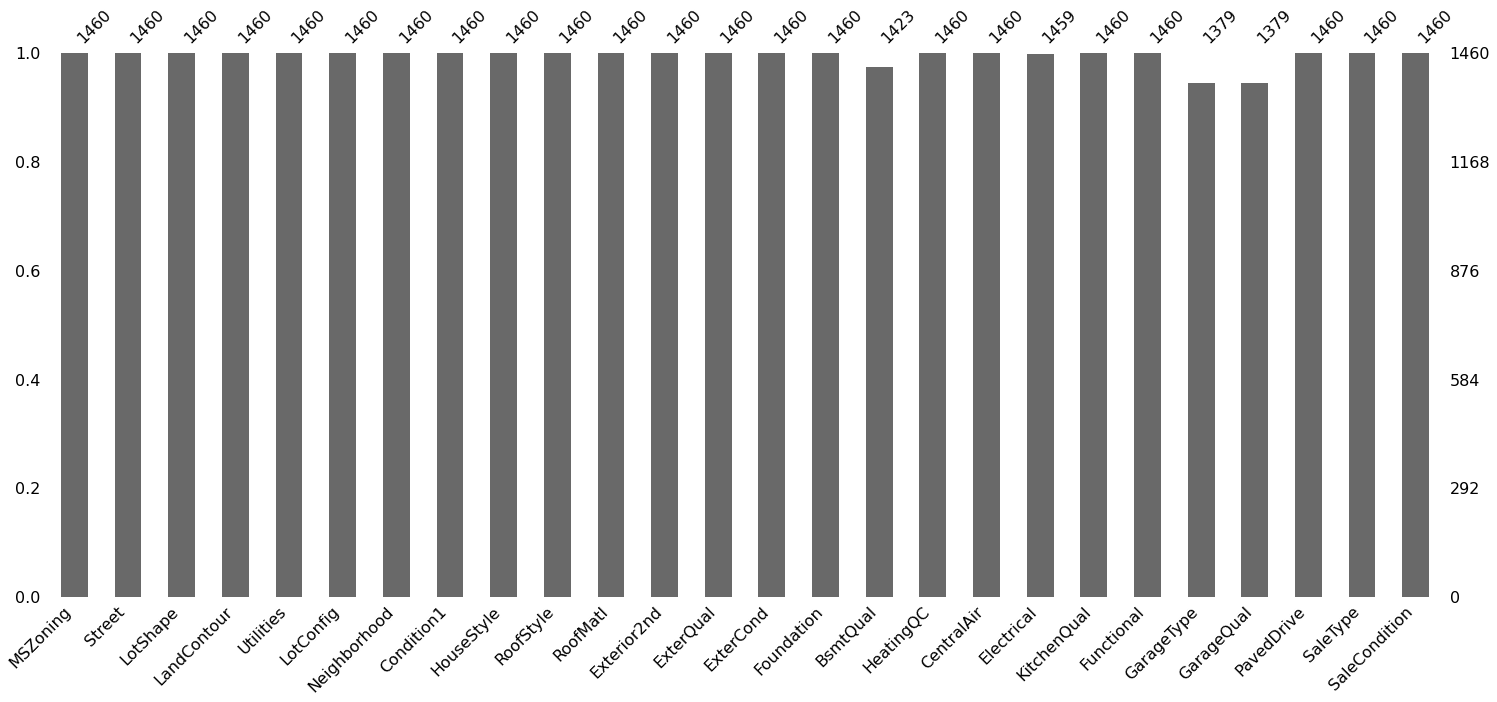

In [59]:
msno.bar(df_obj);

In [60]:
# We can see in this chart there are two column which have missing values that is Garage type and Garage quality. 

# Fill the misssng columns of categorical data 

In [61]:
for i in df_obj.columns:
    if df_obj[i].isnull().sum()>0:
        df_obj[i]=df_obj[i].fillna(df_obj[i].mode()[0])

# Check missing values of categorical columns in percentage after filling the missing values

In [62]:
a=1
for i in df_obj.columns:
    print(a,". ",i,"====>",(df_obj[i].isnull().sum()*100)/df_obj.shape[0],"%\n")
    a=a+1

1 .  MSZoning ====> 0.0 %

2 .  Street ====> 0.0 %

3 .  LotShape ====> 0.0 %

4 .  LandContour ====> 0.0 %

5 .  Utilities ====> 0.0 %

6 .  LotConfig ====> 0.0 %

7 .  Neighborhood ====> 0.0 %

8 .  Condition1 ====> 0.0 %

9 .  HouseStyle ====> 0.0 %

10 .  RoofStyle ====> 0.0 %

11 .  RoofMatl ====> 0.0 %

12 .  Exterior2nd ====> 0.0 %

13 .  ExterQual ====> 0.0 %

14 .  ExterCond ====> 0.0 %

15 .  Foundation ====> 0.0 %

16 .  BsmtQual ====> 0.0 %

17 .  HeatingQC ====> 0.0 %

18 .  CentralAir ====> 0.0 %

19 .  Electrical ====> 0.0 %

20 .  KitchenQual ====> 0.0 %

21 .  Functional ====> 0.0 %

22 .  GarageType ====> 0.0 %

23 .  GarageQual ====> 0.0 %

24 .  PavedDrive ====> 0.0 %

25 .  SaleType ====> 0.0 %

26 .  SaleCondition ====> 0.0 %



In [63]:
df_obj.shape

(1460, 26)

# Check relation of each column with price

In [64]:
df_numeric.corr()["SalePrice"]

MSSubClass      -0.084284
LotArea          0.263843
OverallQual      0.790982
YearBuilt        0.522897
MasVnrArea       0.472614
BsmtFinSF1       0.386420
TotalBsmtSF      0.613581
LowQualFinSF    -0.025606
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageCars       0.640409
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
PoolArea         0.092404
MiscVal         -0.021190
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

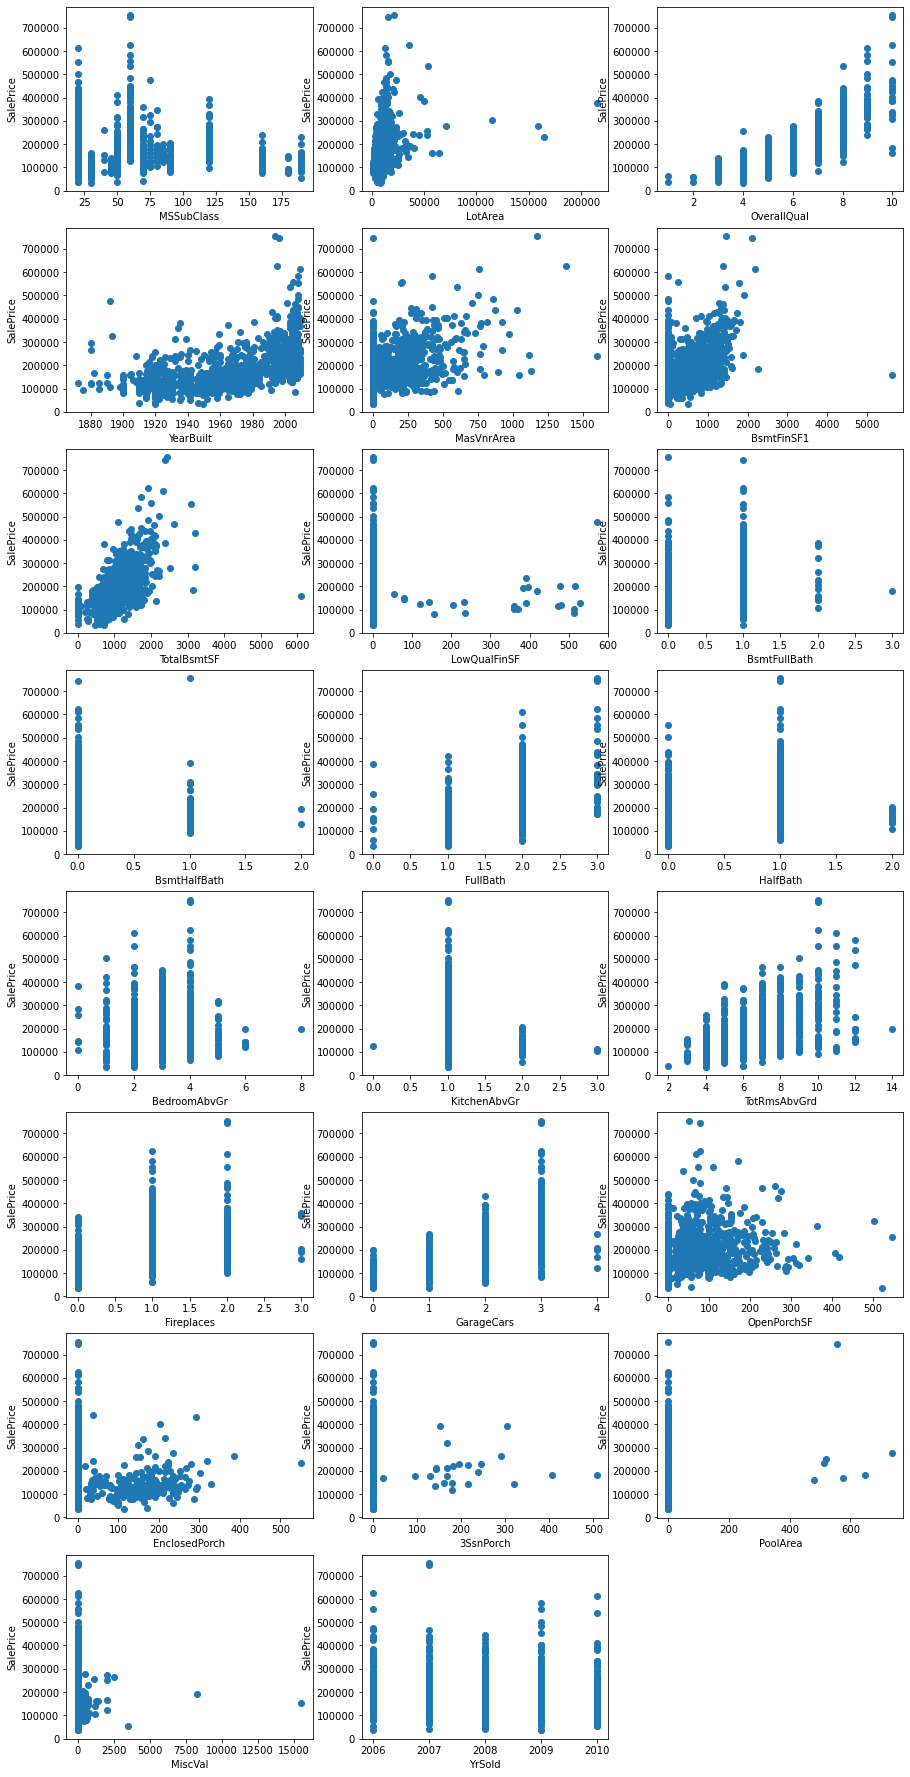

In [65]:
n=1
plt.figure(figsize=(15,40))
for i in df_numeric:
    if i!="SalePrice":
        plt.subplot(10,3,n)
        plt.scatter(df[i],df["SalePrice"])
        plt.xlabel(i)
        plt.ylabel("SalePrice")
        n=n+1

# Join numeric and categorical data

In [66]:
a=pd.concat([df_numeric,df_obj],axis=1)
a.head(2)

,MSSubClass,LotArea,OverallQual,YearBuilt,MasVnrArea,BsmtFinSF1,TotalBsmtSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,YrSold,SalePrice,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,HouseStyle,RoofStyle,RoofMatl,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageQual,PavedDrive,SaleType,SaleCondition
0,60,8450,7,2003,196.0,706,856,0,1,0,2,1,3,1,8,0,2,61,0,0,0,0,2008,208500,RL,Pave,Reg,Lvl,AllPub,Inside,CollgCr,Norm,2Story,Gable,CompShg,VinylSd,Gd,TA,PConc,Gd,Ex,Y,SBrkr,Gd,Typ,Attchd,TA,Y,WD,Normal
1,20,9600,6,1976,0.0,978,1262,0,0,1,2,0,3,1,6,1,2,0,0,0,0,0,2007,181500,RL,Pave,Reg,Lvl,AllPub,FR2,Veenker,Feedr,1Story,Gable,CompShg,MetalSd,TA,TA,CBlock,Gd,Ex,Y,SBrkr,TA,Typ,Attchd,TA,Y,WD,Normal


In [67]:
a.shape

(1460, 50)

# Start EDA(Exporatory Data Analysis) 

# Find the minimum , maximum and average Sale price of the house?

# Find Details

In [68]:
a["SalePrice"].agg(["min","max","mean"])

min      34900.00000
max     755000.00000
mean    180921.19589
Name: SalePrice, dtype: float64

In [69]:
a[a["SalePrice"]==a["SalePrice"].min()]

,MSSubClass,LotArea,OverallQual,YearBuilt,MasVnrArea,BsmtFinSF1,TotalBsmtSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,YrSold,SalePrice,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,HouseStyle,RoofStyle,RoofMatl,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageQual,PavedDrive,SaleType,SaleCondition
495,30,7879,4,1920,0.0,495,720,0,0,0,1,0,2,1,4,0,0,523,115,0,0,0,2009,34900,C (all),Pave,Reg,Lvl,AllPub,Inside,IDOTRR,Norm,1Story,Gable,CompShg,Wd Sdng,TA,TA,CBlock,TA,TA,N,FuseA,TA,Typ,Attchd,TA,N,WD,Abnorml


In [70]:
a[a["SalePrice"]==a["SalePrice"].max()]

,MSSubClass,LotArea,OverallQual,YearBuilt,MasVnrArea,BsmtFinSF1,TotalBsmtSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,YrSold,SalePrice,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,HouseStyle,RoofStyle,RoofMatl,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageQual,PavedDrive,SaleType,SaleCondition
691,60,21535,10,1994,1170.0,1455,2444,0,0,1,3,1,4,1,10,2,3,50,0,0,0,0,2007,755000,RL,Pave,IR1,Lvl,AllPub,Corner,NoRidge,Norm,2Story,Gable,WdShngl,HdBoard,Ex,TA,PConc,Ex,Ex,Y,SBrkr,Ex,Typ,Attchd,TA,Y,WD,Normal


In [71]:
# We can see that minimum Sale Price of the house is 34900 , maximum Sale Price of the house is 755000 and average Sale Price of the house is 180921 .

# How many houses which have greater than average Sale Price?

In [72]:
len(a[a["SalePrice"]>a["SalePrice"].mean()])

560

In [73]:
# We can see the above output no. of 560 houses is greater than the average Sale Price.

# How many houses which have less than average Sale Price?

In [74]:
len(a[a["SalePrice"]<a["SalePrice"].mean()])

900

In [75]:
# We can see the above output no. of 900 houses is less than the average Sale Price.

# How many different types of Sale Condition and which Sale Condition Demandable most and what is their average Sale Price?

In [76]:
a["SaleCondition"].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

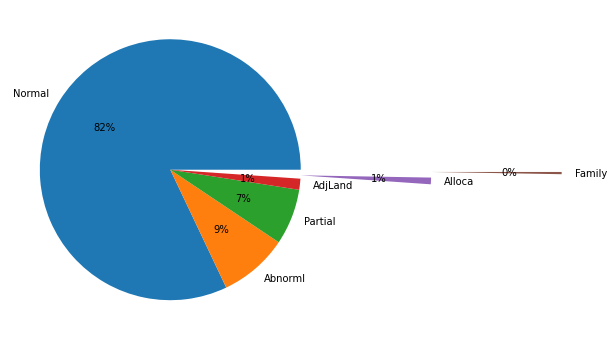

In [77]:
plt.figure(figsize=(12,6));
plt.pie(a["SaleCondition"].value_counts(),labels=a["SaleCondition"].unique(),autopct="%0.00f%%",explode=[0,0,0,0,1,2]);

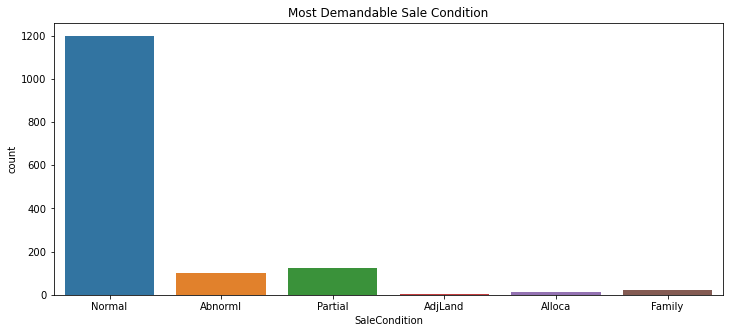

In [78]:
plt.figure(figsize=(12,5));
sns.countplot(x="SaleCondition",data=a);
plt.title("Most Demandable Sale Condition");

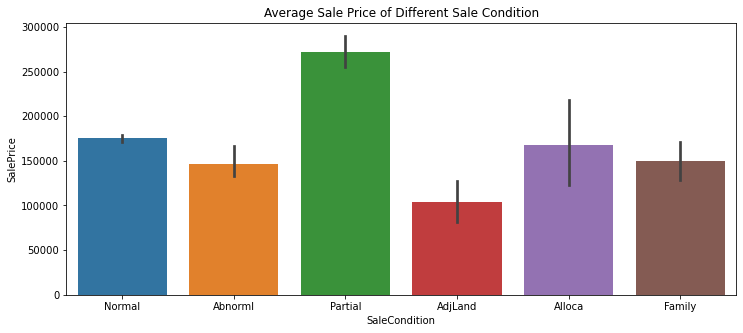

In [79]:
plt.figure(figsize=(12,5));
sns.barplot(x="SaleCondition",y="SalePrice",data=a);
plt.title("Average Sale Price of Different Sale Condition");

In [80]:
# we can see the above charts 6 different type of Sale Condition and Normal Sale Condition is demandable most and their average Sale Price.

# Find the minimum , maximum and average Sale Price of different PavedDrive?

In [81]:
x=a.groupby("PavedDrive")["SalePrice"].agg(["min","max","mean"]).reset_index()
x

,PavedDrive,min,max,mean
0,N,34900,265979,115039.122222
1,P,79500,215000,132330.000000
2,Y,35311,755000,186433.973881


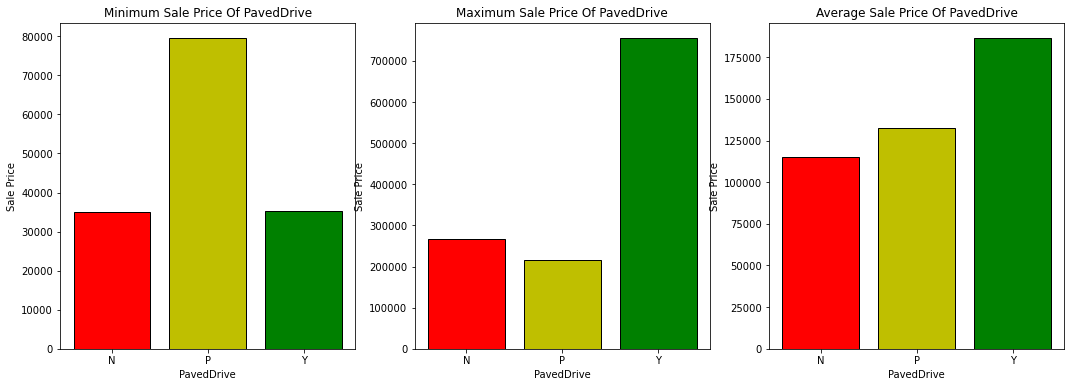

In [82]:
plt.figure(figsize=(18,6));
plt.subplot(1,3,1);
plt.bar(x["PavedDrive"],x["min"],color=["r","y","g"],edgecolor="black");
plt.title("Minimum Sale Price Of PavedDrive");
plt.xlabel("PavedDrive");
plt.ylabel("Sale Price");
plt.subplot(1,3,2);
plt.bar(x["PavedDrive"],x["max"],color=["r","y","g"],edgecolor="black");
plt.title("Maximum Sale Price Of PavedDrive");
plt.xlabel("PavedDrive");
plt.ylabel("Sale Price");
plt.subplot(1,3,3);
plt.bar(x["PavedDrive"],x["mean"],color=["r","y","g"],edgecolor="black");
plt.title("Average Sale Price Of PavedDrive");
plt.xlabel("PavedDrive");
plt.ylabel("Sale Price");

In [83]:
# We can see the above output the maximum , minimum , average Sale Price of different PavedDrive.

# Find out how many different type of GarageQual and what is their maximum , minimum , average Sale Price?

In [84]:
a["GarageQual"].unique()

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [85]:
x=a.groupby("GarageQual")["SalePrice"].agg(["min","max","mean"]).reset_index()
x

,GarageQual,min,max,mean
0,Ex,120500,475000,241000.000000
1,Fa,64500,256000,123573.354167
2,Gd,90350,325000,215860.714286
3,Po,67000,137000,100166.666667
4,TA,34900,755000,182591.864224


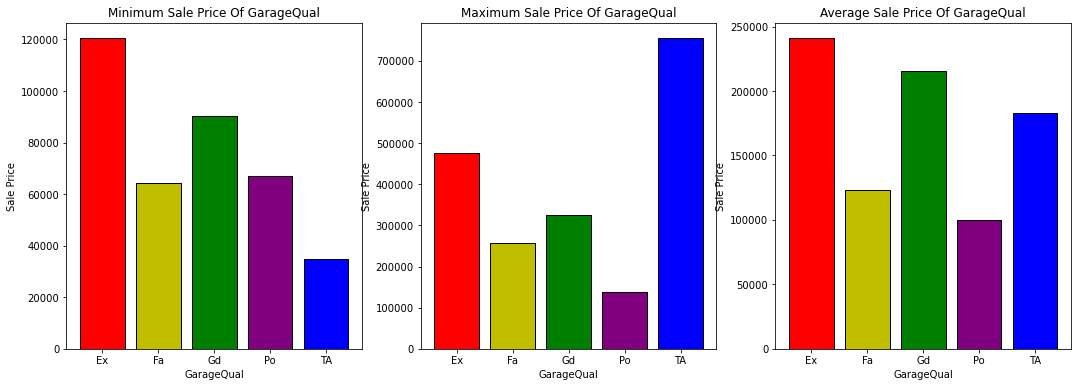

In [86]:
plt.figure(figsize=(18,6));
plt.subplot(1,3,1);
plt.bar(x["GarageQual"],x["min"],color=["r","y","g","purple","b"],edgecolor="black");
plt.title("Minimum Sale Price Of GarageQual");
plt.xlabel("GarageQual");
plt.ylabel("Sale Price");
plt.subplot(1,3,2);
plt.bar(x["GarageQual"],x["max"],color=["r","y","g","purple","b"],edgecolor="black");
plt.title("Maximum Sale Price Of GarageQual");
plt.xlabel("GarageQual");
plt.ylabel("Sale Price");
plt.subplot(1,3,3);
plt.bar(x["GarageQual"],x["mean"],color=["r","y","g","purple","b"],edgecolor="black");
plt.title("Average Sale Price Of GarageQual");
plt.xlabel("GarageQual");
plt.ylabel("Sale Price");

In [87]:
# We can see the above output the maximum , minimum , average Sale Price of different type of GarageQuality.

# Find how many different car space with garage quality?

In [88]:
a["GarageCars"].unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [89]:
a.groupby(["GarageCars","GarageQual"])["SalePrice"].agg(["min","max","mean"])

min     max           mean
GarageCars GarageQual                               
0          TA           34900  200500  103317.283951
1          Ex          120500  127500  124000.000000
           Fa           64500  250000  118035.212121
           Gd           90350  118000  104175.000000
           Po           67000  137000  100166.666667
           TA           35311  266500  129553.331307
2          Fa           76000  256000  142412.230769
           Gd          157500  325000  234475.000000
           TA           55993  430000  183765.596996
3          Ex          475000  475000  475000.000000
           Fa           87000   98000   92500.000000
           TA           81000  755000  311146.842697
4          TA          123000  265979  192655.800000

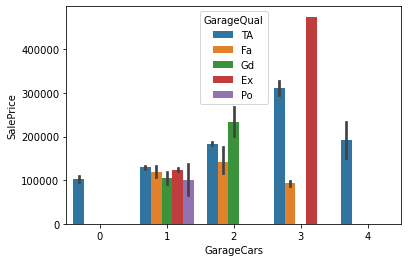

In [90]:
sns.barplot(x="GarageCars",y="SalePrice",data=a,hue="GarageQual");

In [91]:
# - We can see that the highest sale pice of house when the garagecars is 3 and the qual is EX (Excellent).
# - As we can see that the lowest price of the house have garagecars is 3 and qual is FA (Fair).

In [92]:
a.head(1)

,MSSubClass,LotArea,OverallQual,YearBuilt,MasVnrArea,BsmtFinSF1,TotalBsmtSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,YrSold,SalePrice,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,HouseStyle,RoofStyle,RoofMatl,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageQual,PavedDrive,SaleType,SaleCondition
0,60,8450,7,2003,196.0,706,856,0,1,0,2,1,3,1,8,0,2,61,0,0,0,0,2008,208500,RL,Pave,Reg,Lvl,AllPub,Inside,CollgCr,Norm,2Story,Gable,CompShg,VinylSd,Gd,TA,PConc,Gd,Ex,Y,SBrkr,Gd,Typ,Attchd,TA,Y,WD,Normal


# Find out the minimum , maximum and average Sale Price of different type of Kitchen Quality?

In [93]:
x=a.groupby("KitchenQual")["SalePrice"].agg(["min","max","mean"]).reset_index()
x

,KitchenQual,min,max,mean
0,Ex,86000,755000,328554.670000
1,Fa,39300,200000,105565.205128
2,Gd,79000,625000,212116.023891
3,TA,34900,375000,139962.511565


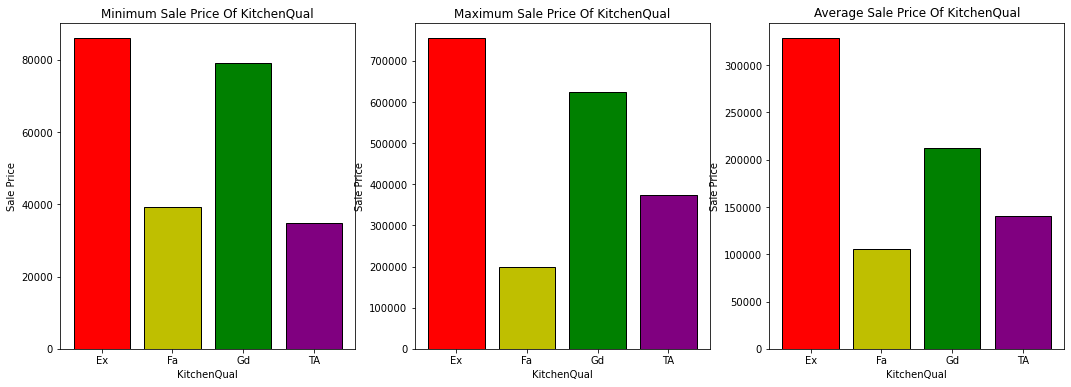

In [94]:
plt.figure(figsize=(18,6));
plt.subplot(1,3,1);
plt.bar(x["KitchenQual"],x["min"],color=["r","y","g","purple"],edgecolor="black");
plt.title("Minimum Sale Price Of KitchenQual");
plt.xlabel("KitchenQual");
plt.ylabel("Sale Price");
plt.subplot(1,3,2);
plt.bar(x["KitchenQual"],x["max"],color=["r","y","g","purple"],edgecolor="black");
plt.title("Maximum Sale Price Of KitchenQual");
plt.xlabel("KitchenQual");
plt.ylabel("Sale Price");
plt.subplot(1,3,3);
plt.bar(x["KitchenQual"],x["mean"],color=["r","y","g","purple","b"],edgecolor="black");
plt.title("Average Sale Price Of KitchenQual");
plt.xlabel("KitchenQual");
plt.ylabel("Sale Price");

# Find how many different KitchenAbvGr and what is their kitchen quality with their Sale Price?

In [95]:
a.groupby(["KitchenAbvGr","KitchenQual"])["SalePrice"].agg(["min","max","mean"])

min     max           mean
KitchenAbvGr KitchenQual                               
0            TA           127500  127500  127500.000000
1            Ex            86000  755000  328554.670000
             Fa            39300  174500  103677.735294
             Gd            79000  625000  212591.749571
             TA            34900  375000  140675.105185
2            Fa            55000  200000  118400.000000
             Gd            93000  140000  119666.666667
             TA            87000  206300  132811.403509
3            TA           106000  113000  109500.000000

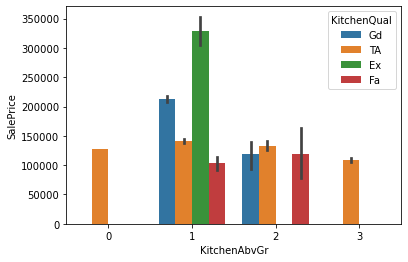

In [96]:
sns.barplot(x="KitchenAbvGr",y="SalePrice",data=a,hue="KitchenQual");

In [97]:
# - So, here we can say that when sale price is lower(34900) then kitchenabvgr is 1 and kitchen qual is TA.
# - And the Sale Price is highest(755000) then kitchenabvgr is 1 and kitchen qual is EX.

In [98]:
a.head(1)

,MSSubClass,LotArea,OverallQual,YearBuilt,MasVnrArea,BsmtFinSF1,TotalBsmtSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,YrSold,SalePrice,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,HouseStyle,RoofStyle,RoofMatl,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageQual,PavedDrive,SaleType,SaleCondition
0,60,8450,7,2003,196.0,706,856,0,1,0,2,1,3,1,8,0,2,61,0,0,0,0,2008,208500,RL,Pave,Reg,Lvl,AllPub,Inside,CollgCr,Norm,2Story,Gable,CompShg,VinylSd,Gd,TA,PConc,Gd,Ex,Y,SBrkr,Gd,Typ,Attchd,TA,Y,WD,Normal


# How many different type of electrical and what is their minimum , maximum and average Sale Price?

In [99]:
a["Electrical"].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [100]:
x=a.groupby("Electrical")["SalePrice"].agg(["min","max","mean"]).reset_index()
x

,Electrical,min,max,mean
0,FuseA,34900,239000,122196.893617
1,FuseF,39300,169500,107675.444444
2,FuseP,73000,137000,97333.333333
3,Mix,67000,67000,67000.000000
4,SBrkr,37900,755000,186810.637453


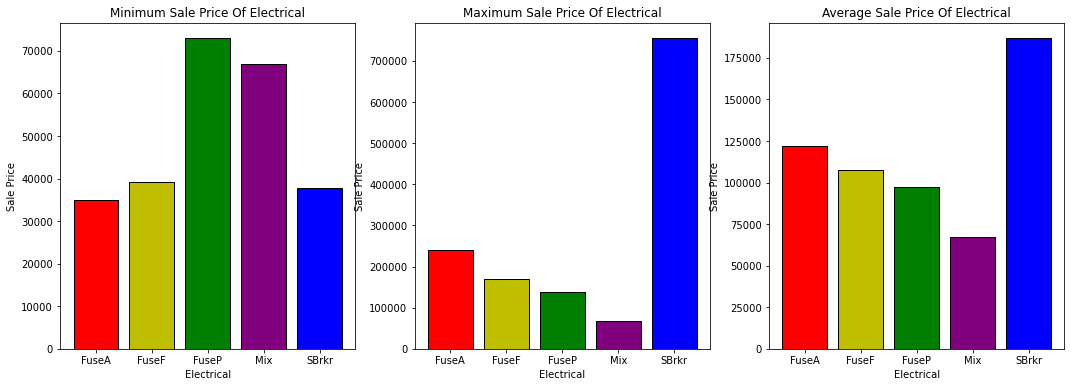

In [101]:
plt.figure(figsize=(18,6));
plt.subplot(1,3,1);
plt.bar(x["Electrical"],x["min"],color=["r","y","g","purple","b"],edgecolor="black");
plt.title("Minimum Sale Price Of Electrical");
plt.xlabel("Electrical");
plt.ylabel("Sale Price");
plt.subplot(1,3,2);
plt.bar(x["Electrical"],x["max"],color=["r","y","g","purple","b"],edgecolor="black");
plt.title("Maximum Sale Price Of Electrical");
plt.xlabel("Electrical");
plt.ylabel("Sale Price");
plt.subplot(1,3,3);
plt.bar(x["Electrical"],x["mean"],color=["r","y","g","purple","b"],edgecolor="black");
plt.title("Average Sale Price Of Electrical");
plt.xlabel("Electrical");
plt.ylabel("Sale Price");

In [102]:
# We can see the above chart minimum , maximum and average Sale Price of different type of electrical.

# Which type of Air Condition most demandable ?

In [103]:
a["CentralAir"].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

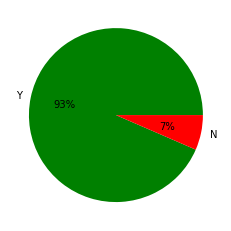

In [104]:
plt.pie(a["CentralAir"].value_counts(),labels=a["CentralAir"].unique(),colors=["green","r"],autopct="%0.0f%%");

In [105]:
# We can see the above chart that most demandable Air Condition is yes.

# What is the minimum , maximum and average sale price if house is having central air or not?

In [106]:
import plotly.io as pio
pio.templates.default = "plotly_dark"
sns.set_theme(style="darkgrid")

In [107]:
x=a.groupby("CentralAir")["SalePrice"].agg(["min","max","mean"]).reset_index()
x

,CentralAir,min,max,mean
0,N,34900,265979,105264.073684
1,Y,52000,755000,186186.709890


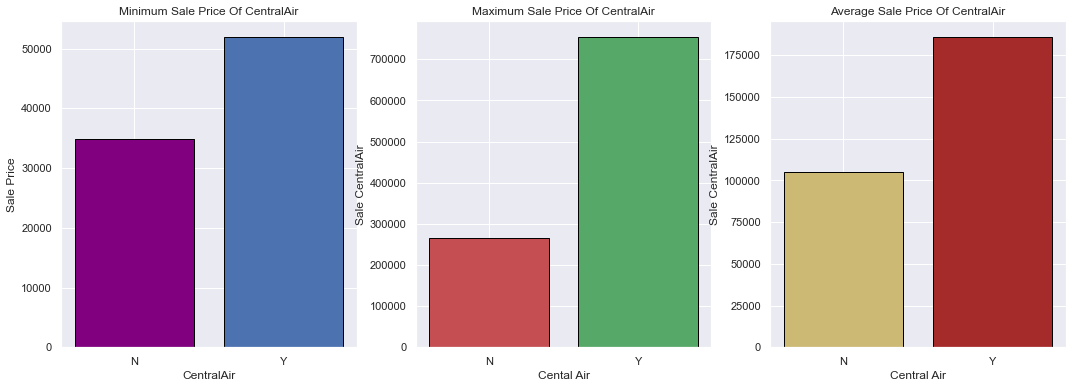

In [108]:
plt.figure(figsize=(18,6));
plt.subplot(1,3,1);
plt.bar(x["CentralAir"],x["min"],color=["purple","b"],edgecolor="black");
plt.title("Minimum Sale Price Of CentralAir");
plt.xlabel("CentralAir");
plt.ylabel("Sale Price");
plt.subplot(1,3,2);
plt.bar(x["CentralAir"],x["max"],color=["r","g"],edgecolor="black");
plt.title("Maximum Sale Price Of CentralAir");
plt.xlabel("Cental Air");
plt.ylabel("Sale CentralAir");
plt.subplot(1,3,3);
plt.bar(x["CentralAir"],x["mean"],color=["y","brown"],edgecolor="black");
plt.title("Average Sale Price Of CentralAir");
plt.xlabel("Central Air");
plt.ylabel("Sale CentralAir");

# Which type of heating Quality demandable most and find the average price of different type of heating quality?

In [109]:
a["HeatingQC"].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

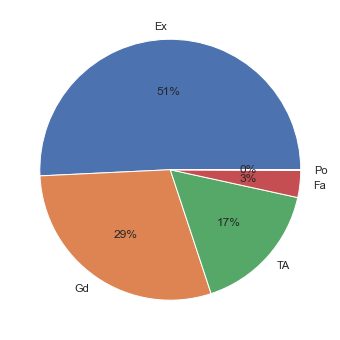

In [110]:
plt.figure(figsize=(10,6));
plt.pie(a["HeatingQC"].value_counts(),labels=a["HeatingQC"].unique(),autopct="%0.0f%%");

In [111]:
# We can say that Excellent Heating Qualtiy is demandable most.

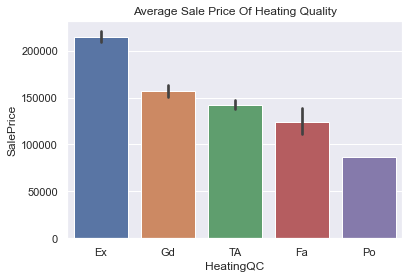

In [112]:
sns.barplot(x="HeatingQC",y="SalePrice",data=a);
plt.title("Average Sale Price Of Heating Quality");

In [113]:
# We can see the average sale price of different type of Heating Quality.

# Which type of ExterQual demandable most and find the average price of different type of ExterQual?

In [114]:
a["ExterQual"].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

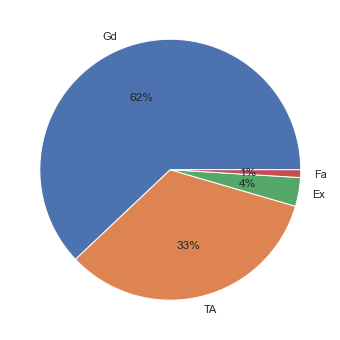

In [115]:
plt.figure(figsize=(10,6));
plt.pie(a["ExterQual"].value_counts(),labels=a["ExterQual"].unique(),autopct="%0.0f%%");

In [116]:
# We can say that Good Exterior Quality is demandable most.

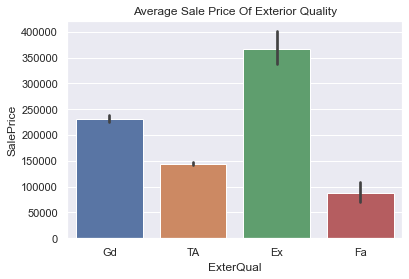

In [117]:
sns.barplot(x="ExterQual",y="SalePrice",data=a);
plt.title("Average Sale Price Of Exterior Quality");

In [118]:
# We can see the average sale price of different type of Exterior Quality.

# Find which type of Exterior2nd is demandabe most and what is their average price?

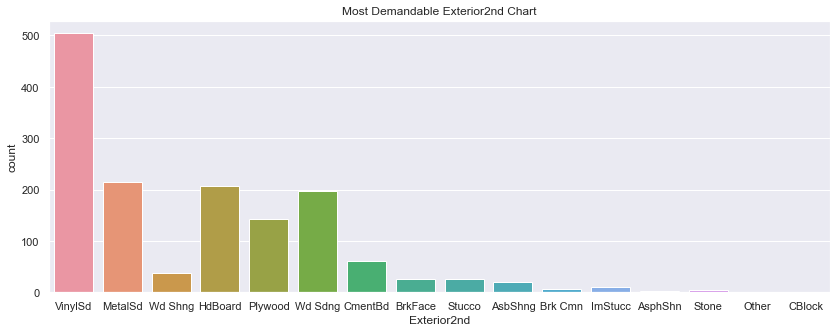

In [119]:
plt.figure(figsize=(14,5));
sns.countplot(x="Exterior2nd",data=a);
plt.title("Most Demandable Exterior2nd Chart");

In [120]:
# We can see that VinylSd is the Exterior2nd type is demandable most .

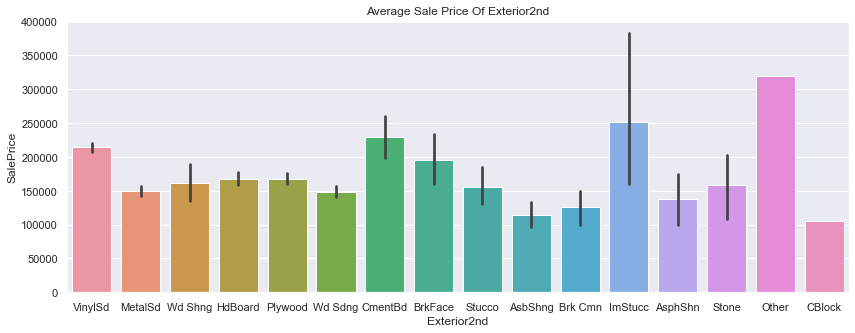

In [121]:
plt.figure(figsize=(14,5));
sns.barplot(x="Exterior2nd",y="SalePrice",data=a);
plt.title("Average Sale Price Of Exterior2nd");

In [122]:
# We can see the average sale price of different type of Exterior2nd.

# What is the minimum , maximum and average sale price of HouseStyle ?

In [123]:
x=a.groupby("HouseStyle")["SalePrice"].agg(["min","max","mean"]).reset_index()
x

,HouseStyle,min,max,mean
0,1.5Fin,37900,410000,143116.740260
1,1.5Unf,76000,139400,110150.000000
2,1Story,34900,611657,175985.477961
3,2.5Fin,104000,475000,220000.000000
4,2.5Unf,101000,325000,157354.545455
5,2Story,40000,755000,210051.764045
6,SFoyer,75500,206300,135074.486486
7,SLvl,91000,345000,166703.384615


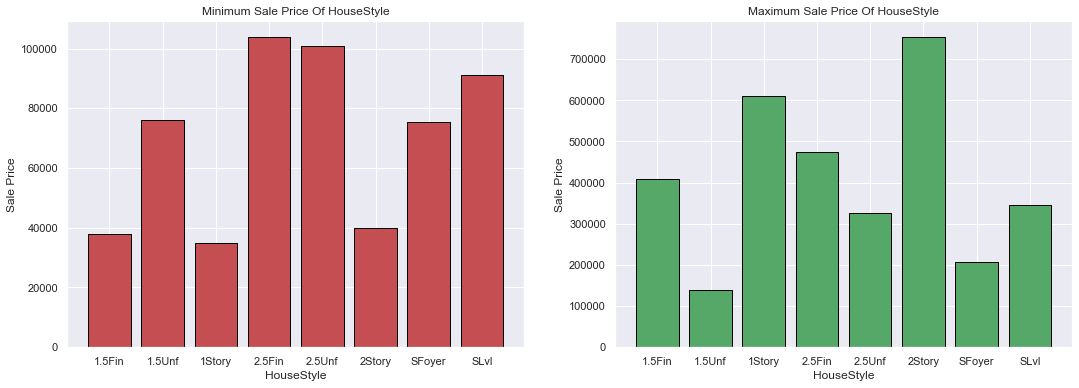

In [124]:
plt.figure(figsize=(18,6));
plt.subplot(1,2,1);
plt.bar(x["HouseStyle"],x["min"],color=["r"],edgecolor="black");
plt.title("Minimum Sale Price Of HouseStyle");
plt.xlabel("HouseStyle");
plt.ylabel("Sale Price");
plt.subplot(1,2,2);
plt.bar(x["HouseStyle"],x["max"],color=["g"],edgecolor="black");
plt.title("Maximum Sale Price Of HouseStyle");
plt.xlabel("HouseStyle");
plt.ylabel("Sale Price");


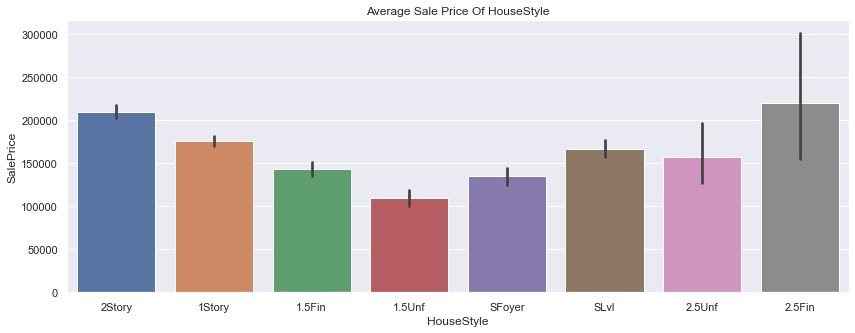

In [125]:
plt.figure(figsize=(14,5));
sns.barplot(x="HouseStyle",y="SalePrice",data=a);
plt.title("Average Sale Price Of HouseStyle");

In [126]:
# We can see the minimum , maximum , average sale price of different type of HouseStyle.

# Which type of neighborhood demandable most and what is their average price?

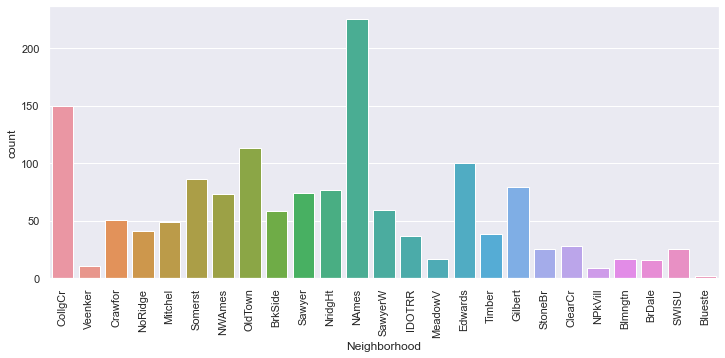

In [127]:
plt.figure(figsize=(12,5));
sns.countplot(x="Neighborhood",data=a);
plt.xticks(rotation=90);

In [128]:
# In the above chart we can see the NAmes and CollgCr type neighborhood demandable most.

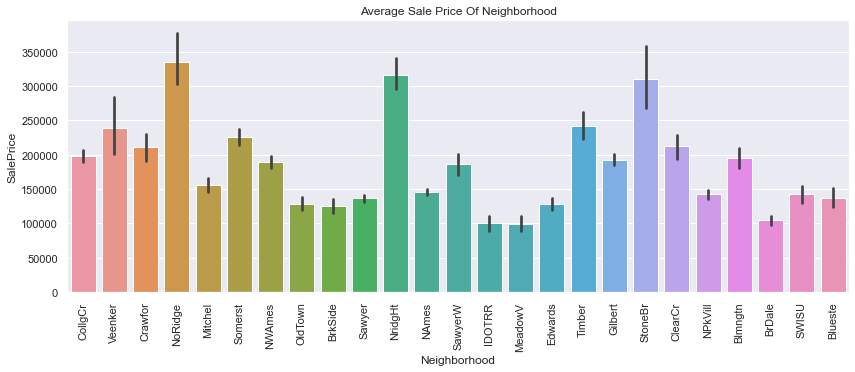

In [129]:
plt.figure(figsize=(14,5));
sns.barplot(x="Neighborhood",y="SalePrice",data=a);
plt.title("Average Sale Price Of Neighborhood");
plt.xticks(rotation=90);

In [130]:
# In the above chart we can see the average SalePrice of different type of Neighborhood.

# Which type of Street demandable most and what is their average price?

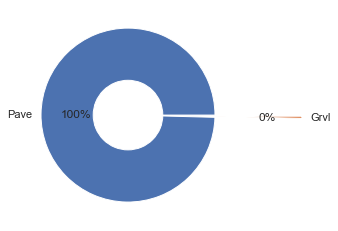

In [131]:
plt.pie(a["Street"].value_counts(),labels=a["Street"].unique(),autopct="%0.0f%%",explode=[0,1]);
plt.pie([1],colors=['w'],radius=0.4);

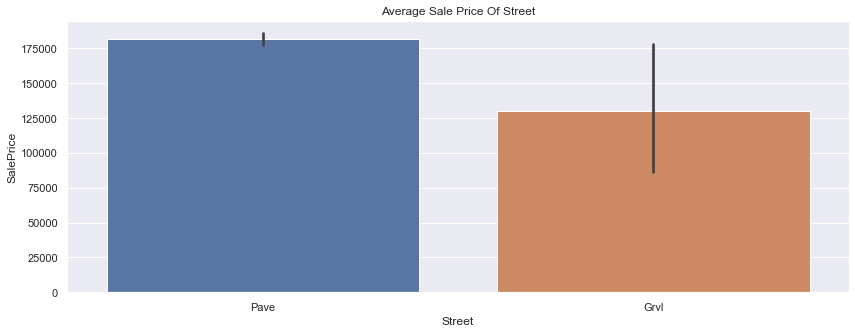

In [132]:
plt.figure(figsize=(14,5));
sns.barplot(x="Street",y="SalePrice",data=a);
plt.title("Average Sale Price Of Street");

In [133]:
# We can see the above charts Pave Street is the demandable most and we can also the average price of both type of street.

# Which type of range LotArea used most ?

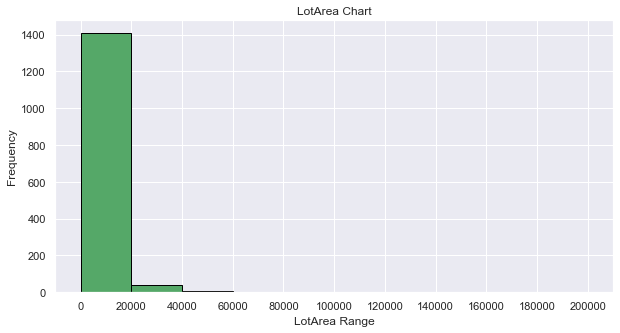

In [134]:
plt.figure(figsize=(10,5));
plt.hist(a["LotArea"],edgecolor="black",color="g",bins=[0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000]);
plt.xticks([0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000]);
plt.title("LotArea Chart");
plt.xlabel("LotArea Range");
plt.ylabel("Frequency");

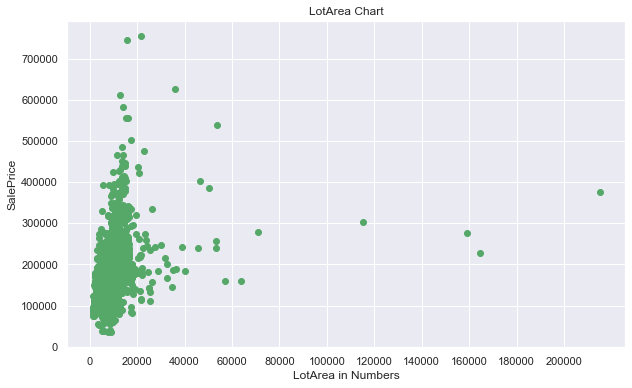

In [135]:
plt.figure(figsize=(10,6));
plt.scatter(a["LotArea"],a["SalePrice"],color=["g"]);
plt.xticks([0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000]);
plt.title("LotArea Chart");
plt.xlabel("LotArea in Numbers");
plt.ylabel("SalePrice");

In [136]:
# We can see the above chart 0 to 20000 is the range where LotArea used most with their SalePrice .

# From which type of OverallQuality of the house is demandable most and what is their average Sale Price ?

In [137]:
a["OverallQual"].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

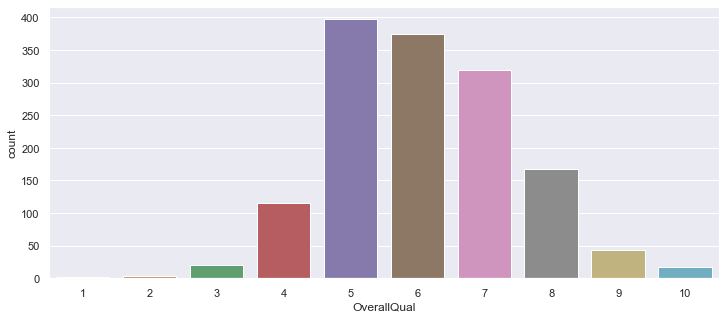

In [138]:
plt.figure(figsize=(12,5));
sns.countplot(x="OverallQual",data=a);

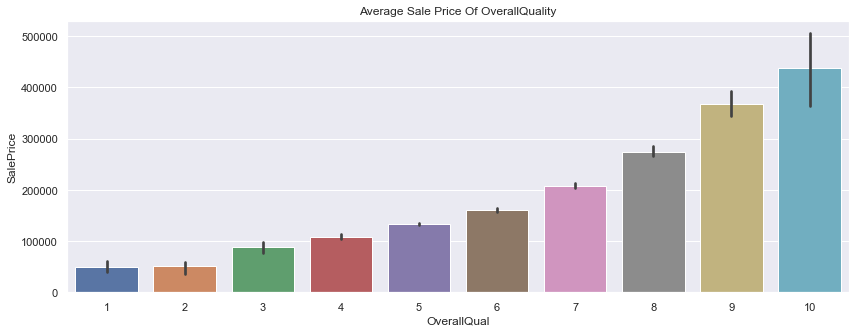

In [139]:
plt.figure(figsize=(14,5));
sns.barplot(x="OverallQual",y="SalePrice",data=a);
plt.title("Average Sale Price Of OverallQuality");

In [140]:
# We can see the above chart highest demandable Overall Quality is 5,6,7 and their average Sale Price.  

# How many BedroomAbvGr is available in the house and what is their average price?

In [141]:
a["BedroomAbvGr"].unique()

array([3, 4, 1, 2, 0, 5, 6, 8], dtype=int64)

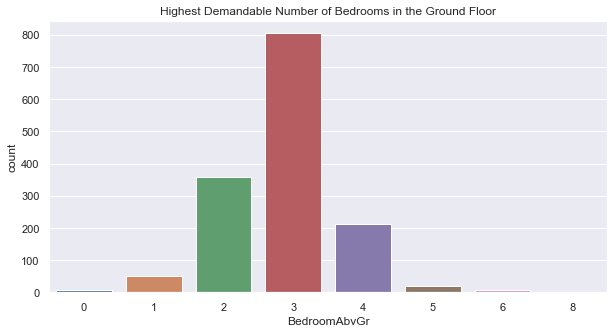

In [142]:
plt.figure(figsize=(10,5));
sns.countplot(x="BedroomAbvGr",data=a);
plt.title("Highest Demandable Number of Bedrooms in the Ground Floor");

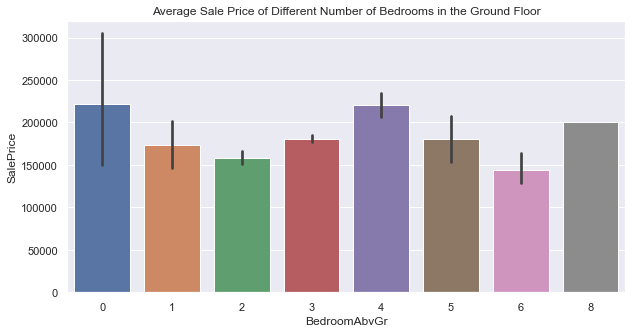

In [143]:
plt.figure(figsize=(10,5));
sns.barplot(x="BedroomAbvGr",y="SalePrice",data=a);
plt.title("Average Sale Price of Different Number of Bedrooms in the Ground Floor");

In [144]:
# We can see the above charts highest demandable bedrooms is 3 and also see the average price of different number of bedrooms.

# How many KitchenAbvGr is available in the house and what is their average price?

In [145]:
a["KitchenAbvGr"].unique()

array([1, 2, 3, 0], dtype=int64)

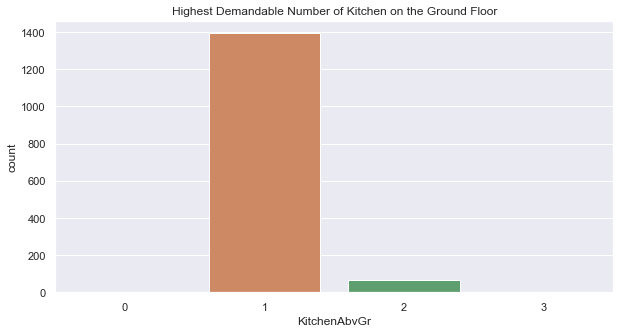

In [146]:
plt.figure(figsize=(10,5));
sns.countplot(x="KitchenAbvGr",data=a);
plt.title("Highest Demandable Number of Kitchen on the Ground Floor");

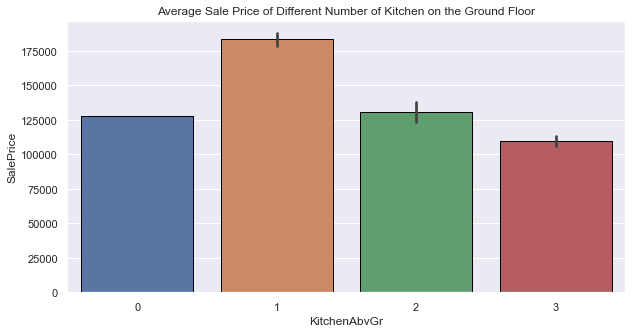

In [147]:
plt.figure(figsize=(10,5));
sns.barplot(x="KitchenAbvGr",y="SalePrice",data=a,edgecolor="black");
plt.title("Average Sale Price of Different Number of Kitchen on the Ground Floor");

In [148]:
# We can see the highest demandable kitchen on th ground floor is 1 and we can also see the averge price of the above chart.

# How many number of fireplaces in the house is demandable most and what is their average price?

In [149]:
a["Fireplaces"].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

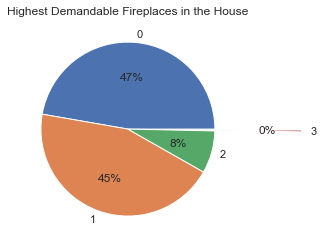

In [150]:
plt.pie(a["Fireplaces"].value_counts(),labels=a["Fireplaces"].unique(),autopct="%0.0f%%",explode=[0,0,0,1]);
plt.title("Highest Demandable Fireplaces in the House");

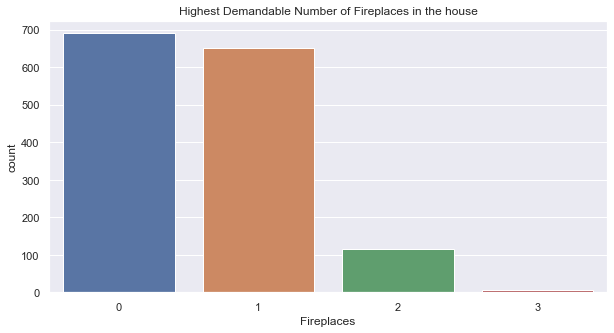

In [151]:
plt.figure(figsize=(10,5));
sns.countplot(x="Fireplaces",data=a);
plt.title("Highest Demandable Number of Fireplaces in the house");

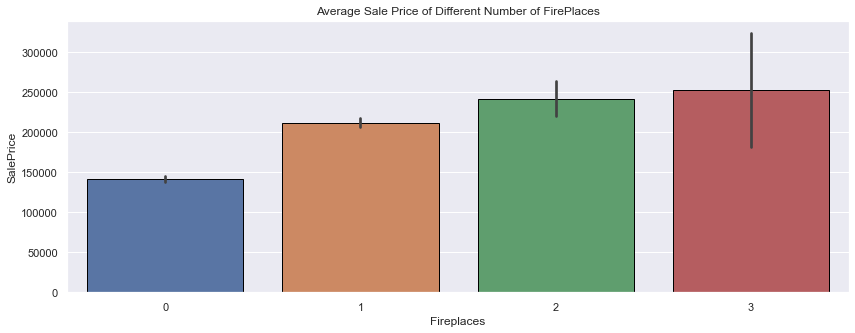

In [152]:
plt.figure(figsize=(14,5));
sns.barplot(x="Fireplaces",y="SalePrice",data=a,edgecolor="black");
plt.title("Average Sale Price of Different Number of FirePlaces");

In [153]:
# We can see the above charts highest number of fireplaces and average Saleprice.

# How many fire places in the different number of house style and what is their average price?

In [154]:
a.groupby("Fireplaces")["HouseStyle"].value_counts().sort_values(ascending=False)

Fireplaces  HouseStyle
0           1Story        376
1           1Story        298
            2Story        244
0           2Story        162
            1.5Fin         84
1           1.5Fin         56
2           1Story         50
            2Story         37
1           SLvl           35
0           SFoyer         29
            SLvl           24
2           1.5Fin         14
0           1.5Unf          9
1           2.5Unf          6
2           SLvl            5
            SFoyer          4
1           1.5Unf          4
            SFoyer          4
            2.5Fin          3
0           2.5Unf          3
            2.5Fin          3
2           2.5Fin          2
            2.5Unf          2
3           1Story          2
            2Story          2
2           1.5Unf          1
3           SLvl            1
Name: HouseStyle, dtype: int64

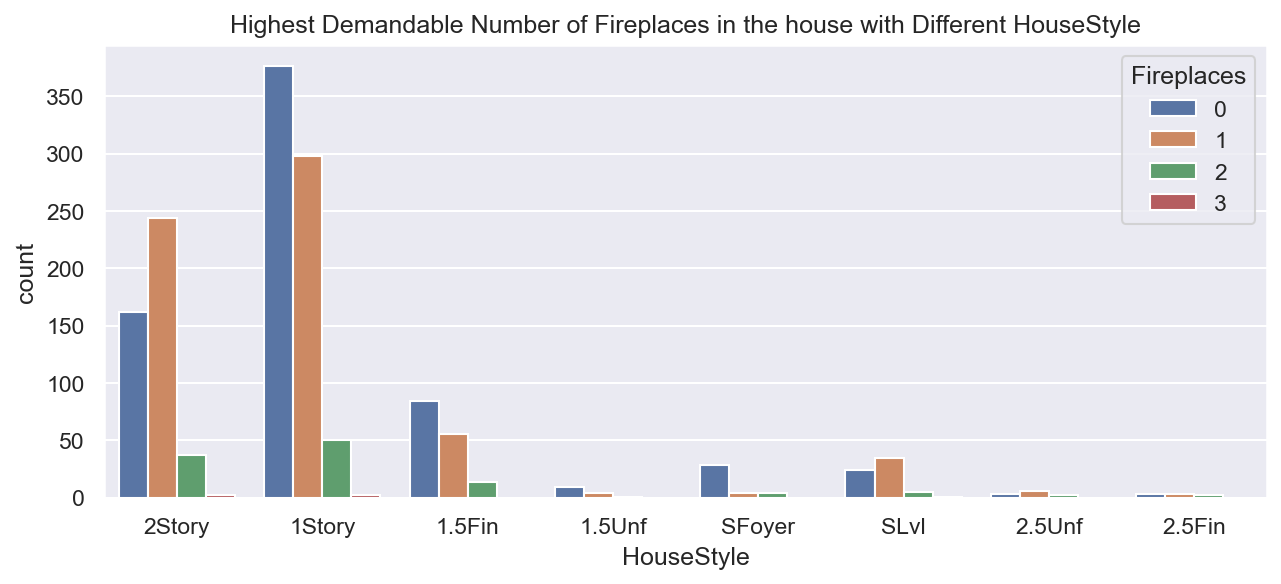

In [155]:
plt.figure(figsize=(10,4),dpi=150);
sns.countplot(x="HouseStyle",data=a,hue="Fireplaces");
plt.title("Highest Demandable Number of Fireplaces in the house with Different HouseStyle");

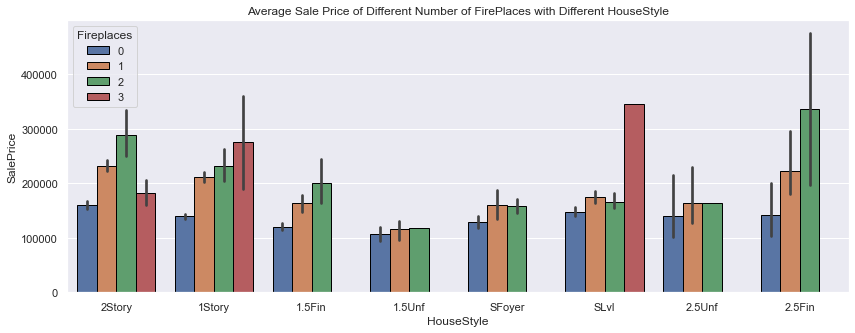

In [156]:
plt.figure(figsize=(14,5));
sns.barplot(x="HouseStyle",y="SalePrice",data=a,hue="Fireplaces",edgecolor="black");
plt.title("Average Sale Price of Different Number of FirePlaces with Different HouseStyle");

In [157]:
# We can see the above charts highest number of fireplaces in the different HouseStyle  and average Sale price of different number of HouseStyle.

# From Which Sale Price range customer lies most ?

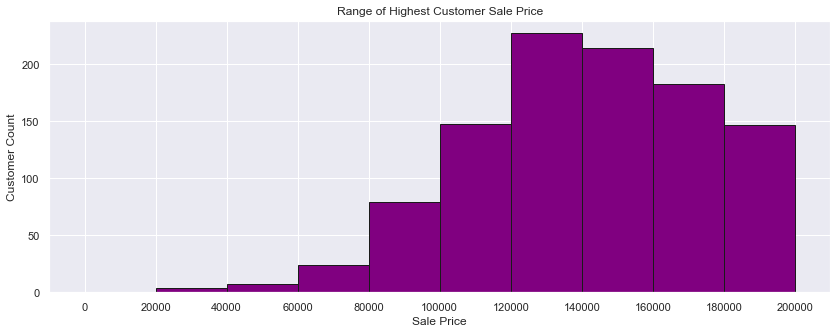

In [158]:
plt.figure(figsize=(14,5));
plt.hist(x="SalePrice",data=a,bins=[0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000],color="purple",edgecolor="k");
plt.xticks([0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000]);
plt.title("Range of Highest Customer Sale Price");
plt.xlabel("Sale Price");
plt.ylabel("Customer Count");

In [159]:
# We can see the above chart Highest customer Sale Price lies in 120000 to 180000 range.

# Analyses Ended

# Drop insignificient features for machine learning point of view

In [160]:
a.drop(columns=["SaleCondition","SaleType","GarageType","Functional","ExterQual"],inplace=True)

In [161]:
a.shape

(1460, 45)

# Create list of object columns for encoding

In [162]:
l=[]
for i in a.columns:
    if a[i].dtype=="object":
        l.append(i)
l

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior2nd',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'GarageQual',
 'PavedDrive']

In [163]:
r=1
for i in l:
    print(r,". ",i,"====>",a[i].unique()," = ",a[i].nunique(),"\n")
    r=r+1

1 .  MSZoning ====> ['RL' 'RM' 'C (all)' 'FV' 'RH']  =  5 

2 .  Street ====> ['Pave' 'Grvl']  =  2 

3 .  LotShape ====> ['Reg' 'IR1' 'IR2' 'IR3']  =  4 

4 .  LandContour ====> ['Lvl' 'Bnk' 'Low' 'HLS']  =  4 

5 .  Utilities ====> ['AllPub' 'NoSeWa']  =  2 

6 .  LotConfig ====> ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']  =  5 

7 .  Neighborhood ====> ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']  =  25 

8 .  Condition1 ====> ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']  =  9 

9 .  HouseStyle ====> ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']  =  8 

10 .  RoofStyle ====> ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']  =  6 

11 .  RoofMatl ====> ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']  =  8 

1

# Encode the object columns

In [164]:
a["MSZoning"]=a["MSZoning"].replace({"RL":0,"RM":1,"C (all)":2,"FV":3,"RH":4})

a["Street"]=a["Street"].replace({"Pave":0,"Grvl":1})

a["LotShape"]=a["LotShape"].replace({"Reg":0,"IR1":1,"IR2":2,"IR3":3})

a["LandContour"]=a["LandContour"].replace({"Lvl":0,"Bnk":1,"Low":2,"HLS":3})

a["Utilities"]=a["Utilities"].replace({"AllPub":0,"NoSeWa":1})

a["LotConfig"]=a["LotConfig"].replace({"Inside":0,"FR2":1,"Corner":2,"CulDSac":3,"FR3":4})

a["ExterCond"]=a["ExterCond"].replace({'TA':0,'Gd':1,'Fa':2,'Po':3,'Ex':4}) 

a["Foundation"]=a["Foundation"].replace({'PConc':0,'CBlock':1,'BrkTil':2,'Wood':3,'Slab':4,'Stone':5}) 

a["BsmtQual"]=a["BsmtQual"].replace({'Gd':0,'TA':1,'Ex':2,'Fa':3}) 

a["HeatingQC"]=a["HeatingQC"].replace({'Ex':0, 'Gd':1 ,'TA':2 ,'Fa':3 ,'Po':4}) 

a["CentralAir"]=a["CentralAir"].replace({'Y':0, 'N':1})  

a["Electrical"]=a["Electrical"].replace({'SBrkr':0, 'FuseF':1, 'FuseA':2, 'FuseP':3, 'Mix':4}) 

a["KitchenQual"]=a["KitchenQual"].replace({'Gd':0, 'TA':1 ,'Ex':2, 'Fa':3})  

a["GarageQual"]=a["GarageQual"].replace({'TA':0 ,'Fa':1 ,'Gd':2, 'Ex':3, 'Po':4})  

a["PavedDrive"]=a["PavedDrive"].replace({'Y':0, 'N':1, 'P':2}) 

a["Condition1"]=a["Condition1"].replace({'Norm':0,'Feedr':1,'PosN':2,'Artery':3,'RRAe':4,'RRNn':5,'RRAn':6,'PosA':7,'RRNe':8})

a["HouseStyle"]=a["HouseStyle"].replace({'2Story':0,'1Story':1,'1.5Fin':2,'1.5Unf':3,'SFoyer':4,'SLvl':5,'2.5Unf':6,'2.5Fin':7})

a["RoofStyle"]=a["RoofStyle"].replace({'Gable':0,'Hip':1,'Gambrel':2,'Mansard':3,'Flat':4,'Shed':5})

a["RoofMatl"]=a["RoofMatl"].replace({'CompShg':0,'WdShngl':1,'Metal':2,'WdShake':3,'Membran':4,'Tar&Grv':5,'Roll':6,'ClyTile':7})

# Using Mean Target Encoding on Neighborhood and Exterior2nd columns because in 2 columns their have so many different categories

In [165]:
z=a.groupby("Neighborhood")["SalePrice"].agg(["mean"]).reset_index()
z

,Neighborhood,mean
0,Blmngtn,194870.882353
1,Blueste,137500.000000
2,BrDale,104493.750000
3,BrkSide,124834.051724
4,ClearCr,212565.428571
5,CollgCr,197965.773333
6,Crawfor,210624.725490
7,Edwards,128219.700000
8,Gilbert,192854.506329
9,IDOTRR,100123.783784


In [166]:
c1=z

In [167]:
y=[]
for i in a["Neighborhood"]:
    for j,k in z.iterrows(): 
        if i==k["Neighborhood"]:
            y.append(k["mean"])

In [168]:
a["Neighborhood"]=y

In [169]:
z=a.groupby("Exterior2nd")["SalePrice"].agg(["mean"]).reset_index()
z

,Exterior2nd,mean
0,AsbShng,114060.550000
1,AsphShn,138000.000000
2,Brk Cmn,126714.285714
3,BrkFace,195818.000000
4,CBlock,105000.000000
5,CmentBd,230093.833333
6,HdBoard,167661.565217
7,ImStucc,252070.000000
8,MetalSd,149803.172897
9,Other,319000.000000


In [170]:
c2=z

In [171]:
y=[]
for i in a["Exterior2nd"]:
    for j,k in z.iterrows():
        if i==k["Exterior2nd"]:
            y.append(k["mean"])

In [172]:
a["Exterior2nd"]=y

# Check unique values of object columns after encoding

In [173]:
r=1
for i in l:
    print(r,". ",i,"====>",a[i].unique()," = ",a[i].nunique(),"\n")
    r=r+1

1 .  MSZoning ====> [0 1 2 3 4]  =  5 

2 .  Street ====> [0 1]  =  2 

3 .  LotShape ====> [0 1 2 3]  =  4 

4 .  LandContour ====> [0 1 2 3]  =  4 

5 .  Utilities ====> [0 1]  =  2 

6 .  LotConfig ====> [0 1 2 3 4]  =  5 

7 .  Neighborhood ====> [197965.77333333 238772.72727273 210624.7254902  335295.31707317
 156270.12244898 225379.8372093  189050.06849315 128225.30088496
 124834.05172414 136793.13513514 316270.62337662 145847.08
 186555.79661017 100123.78378378  98576.47058824 128219.7
 242247.44736842 192854.50632911 310499.         212565.42857143
 142694.44444444 194870.88235294 104493.75       142591.36
 137500.        ]  =  25 

8 .  Condition1 ====> [0 1 2 3 4 5 6 7 8]  =  9 

9 .  HouseStyle ====> [0 1 2 3 4 5 6 7]  =  8 

10 .  RoofStyle ====> [0 1 2 3 4 5]  =  6 

11 .  RoofMatl ====> [0 1 2 3 4 5 6 7]  =  8 

12 .  Exterior2nd ====> [214432.46031746 149803.1728972  161328.94736842 167661.56521739
 168112.38732394 148386.06598985 230093.83333333 195818.
 155905.15384615

In [174]:
a.shape

(1460, 45)

# Seggregate the features and target to train the machine .

In [175]:
x=a.drop(columns=["SalePrice"])
y=a["SalePrice"]

In [176]:
print(x.shape)
print(len(y))

(1460, 44)
1460


# Using StandardScaler for Linear Regression and KNN algorithm because these 2 algorithm work only scaled data.

In [177]:
sc=StandardScaler()

In [178]:
x_scaled=sc.fit_transform(x)

In [179]:
lr=LinearRegression()
knn=KNeighborsRegressor()

# Check how much percent is my machine trained .

In [180]:
r2score=[]
Models=[lr,knn]
for i in Models:
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(i,x_scaled,y,scoring='r2',cv=cv,n_jobs=-1)
    r2=np.mean(scores)
    r2score.append(r2)
r2score    



[0.7947538790710423, 0.7591829490594147]

# Using these algorithm for checking the accuracy of my model without use any scailing because these algorithm does not work on scale data .

In [181]:
dtc=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgb=XGBRegressor()
adb=AdaBoostRegressor()


In [182]:
Model=[dtc,rfr,gbr,xgb,adb]

In [183]:
for i in Model:
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(i,x,y,scoring='r2',cv=cv,n_jobs=-1)
    r2=np.mean(scores)
    r2score.append(r2)
r2score   

[0.7947538790710423,
 0.7591829490594147,
 0.6524434888173698,
 0.8525783533786953,
 0.8739079160658869,
 0.8505131903552341,
 0.7985647982675385]

In [184]:
Model_names=["LinearRegression","KNN","Decisiontree","randomforest","gradientboost","xgboost","adaboost"]
Model_s_evaluation = pd.DataFrame({'Regressor Models': Model_names, 'r square': r2score})
Model_s_evaluation


,Regressor Models,r square
0,LinearRegression,0.794754
1,KNN,0.759183
2,Decisiontree,0.652443
3,randomforest,0.852578
4,gradientboost,0.873908
5,xgboost,0.850513
6,adaboost,0.798565


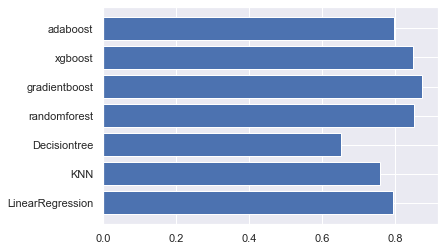

In [185]:
plt.barh(Model_s_evaluation["Regressor Models"],Model_s_evaluation["r square"]);

In [186]:
# We can see that Gradient Boosting is the algorithm where my model is trained highest .

# For confirmation use Gradient Boosting algorithm on train dataset for checking bia and varience .

# Split train and test data 

In [187]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1200)

In [188]:
gbr=GradientBoostingRegressor()

In [189]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [190]:
y_pred=gbr.predict(x_test)

In [191]:
from sklearn.metrics import mean_squared_error as MSE,r2_score as r2

In [192]:
r2(y_test,y_pred) # Accuracy on test data

0.8773313986429573

In [193]:
y_pred_train=gbr.predict(x_train)

In [194]:
r2(y_train,y_pred_train) # Accuracy on test data

0.9525042648449252

# Finish